# Importing Pandas library to create a Dataframe

In [1]:
import pandas as pd 

 Reading a data from txt file 
 Can use either read_csv method or read_table method
 While using csv, mention sep as '\t'

In [2]:
df = pd.read_table('fruit_data_with_colors.txt')

In [17]:
df.tail()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
54,4,lemon,unknown,116,6.1,8.5,0.71
55,4,lemon,unknown,116,6.3,7.7,0.72
56,4,lemon,unknown,116,5.9,8.1,0.73
57,4,lemon,unknown,152,6.5,8.5,0.72
58,4,lemon,unknown,118,6.1,8.1,0.70


# Data Analysis

In [176]:
df.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [177]:
df.mean()

fruit_label      2.542373
mass           163.118644
width            7.105085
height           7.693220
color_score      0.762881
dtype: float64

In [178]:
df.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [180]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
predct = dict(zip(df.fruit_label.unique(), df.fruit_name.unique()))   
predct


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [143]:
fname = df['fruit_name'].unique()
fname

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [182]:
fsize = df.groupby('fruit_name',sort = False).size()
fsize # It contains only integer values and not names of fruits


fruit_name
apple       19
mandarin     5
orange      19
lemon       16
dtype: int64

In [153]:
print(type(fsize))
print(fsize.dtype)

<class 'pandas.core.series.Series'>
int64


# Plotting Graph

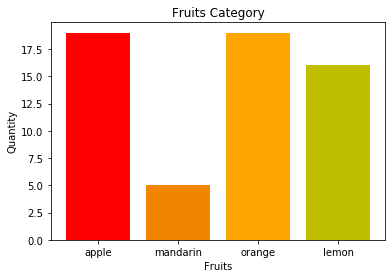

In [174]:
import matplotlib.pyplot as plt
plt.bar(fname,fsize,color = ['r','#f28500','orange','y']) # #f28500 is a hex color for mandarin
plt.xlabel('Fruits')
plt.ylabel('Quantity')
plt.title('Fruits Category')
plt.show()

# 2D Projection


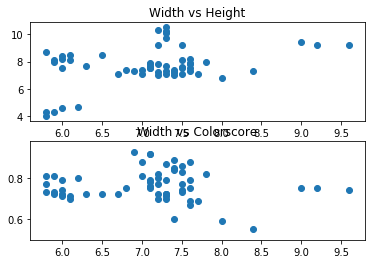

In [212]:
a =  plt.subplot(211)
a.scatter(df['width'],df['height'])
a.set_title('Width vs Height')
a =  plt.subplot(212)
a.scatter(df['width'],df['color_score'])
a.set_title('Width vs Colorscore')
plt.show()

# 3D Projection

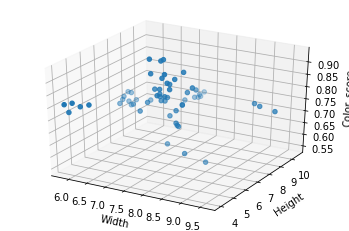

In [188]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(df['width'],df['height'],df['color_score'])
ax1.set_xlabel('Width')
ax1.set_ylabel('Height')
ax1.set_zlabel('Color_score')

plt.show()

# Taking input and output

In [57]:
x = df.iloc [:,[3,4,5,6]].values
y = df.iloc [:,1].values

In [58]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=41)


# Normalization using min max scaler

In [120]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
x_test.shape

(15, 4)

In [123]:
model = KNeighborsClassifier(n_neighbors = 7)

In [124]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [125]:
y_pred = model.predict(x_test)

In [126]:
y_pred

array(['lemon', 'apple', 'apple', 'lemon', 'lemon', 'lemon', 'apple',
       'orange', 'lemon', 'apple', 'orange', 'orange', 'orange', 'apple',
       'orange'], dtype=object)

In [127]:
y_test

array(['lemon', 'apple', 'apple', 'lemon', 'lemon', 'lemon', 'apple',
       'apple', 'lemon', 'apple', 'orange', 'orange', 'orange', 'orange',
       'orange'], dtype=object)

# Accuray Score for classification

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8666666666666667

In [136]:

y1 =[[176,7.4,7.2,0.60]]
y1=scaler.transform(y1) # Seperately normalizing, very important step, without doing this, you will always get Orange as answer
y1

array([[0.34965035, 0.42105263, 0.49230769, 0.13513514]])

In [137]:

y2 =[[116,6.3,7.7,0.72]]
y2=scaler.transform(y2)
y2

array([[0.13986014, 0.13157895, 0.56923077, 0.45945946]])

In [139]:
y1=model.predict(y1)
y1

array(['apple'], dtype=object)

In [140]:
y2=model.predict(y2)
y2

array(['lemon'], dtype=object)